In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient("localhost", 27017)

In [3]:
db = client.trades

In [4]:
results = db.trades.aggregate([
        #{"$match": {"team": "Dallas Mavericks"}},
        {"$group": 
            {"_id": {"season":"$season", "team": "$team"}, 
             "grade": {"$avg": "$grade"}}}])

In [5]:
data = [[row["_id"]["season"], row["_id"]["team"], row["grade"]] for row in list(results)]

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data, columns=["season", "team", "grade"])

In [8]:
standings = pd.read_csv("standings.csv", delimiter=";")
columns=[('season',year) for year in standings.columns[1:5]]
standings = pd.melt(standings, value_vars=["2017", "2016", "2015", "2014"], id_vars="team", var_name="season")
standings["season"] = standings["season"].apply(lambda x: int(x))
standings = standings.rename_axis({"value":"standing"}, axis=1)

In [9]:
data = pd.merge(standings, df, on=["team", "season"], how="inner")
data

,team,season,standing,grade
0,Atlanta Hawks,2017,13,7.000000
1,Brooklyn Nets,2017,30,8.333333
2,Charlotte Hornets,2017,18,4.500000
3,Chicago Bulls,2017,15,6.500000
4,Cleveland Cavaliers,2017,5,10.250000
5,Dallas Mavericks,2017,22,7.333333
6,Denver Nuggets,2017,19,8.333333
7,Golden State Warriors,2017,1,11.000000
8,Houston Rockets,2017,3,7.750000
9,Indiana Pacers,2017,17,7.666667


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

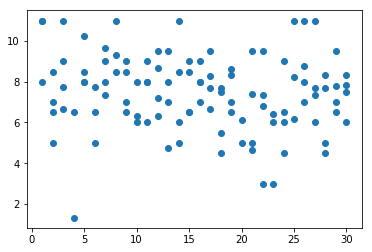

In [19]:
plt.scatter(data["standing"], data["grade"])

In [20]:
mean = data.groupby(by="team")["standing", "grade"].mean()
mean


,standing,grade
team,,
Atlanta Hawks,10.500000,6.750000
Boston Celtics,17.333333,8.277778
Brooklyn Nets,23.250000,7.233333
Charlotte Hornets,16.750000,6.491667
Chicago Bulls,15.000000,6.833333
Cleveland Cavaliers,9.500000,9.062500
Dallas Mavericks,14.000000,7.833333
Denver Nuggets,21.500000,7.808333
Detroit Pistons,20.000000,7.800000


In [21]:
mean.corr()

,standing,grade
standing,1.000000,-0.220946
grade,-0.220946,1.000000


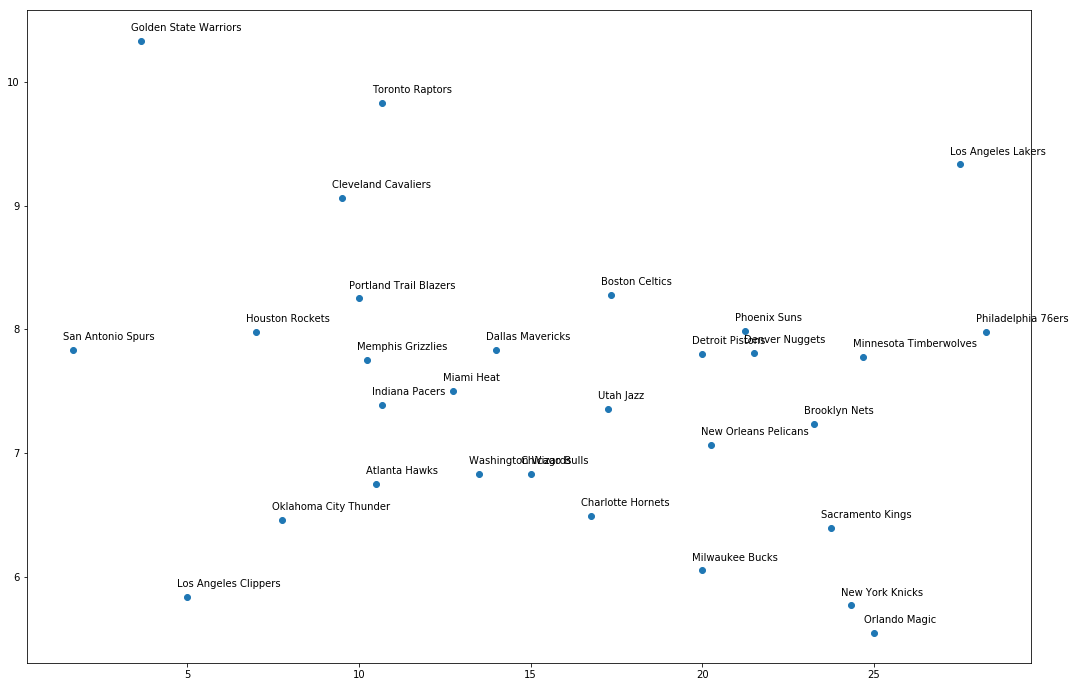

In [22]:
fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(mean["standing"], mean["grade"])

for idx, label in enumerate(mean.index):
    ax.annotate(label, (mean.ix[idx,0], mean.ix[idx, 1]), xytext=(-10,10), textcoords="offset pixels")